<!-- 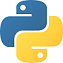-->
# 13 Graphs 


## Plan for the Lecture 

* Graph Theory and Descriptive Terminology

* BFS + DFS for Graphs

* Minimum Spanning Trees

* Topological Sort

## Introduction to Graphs

* The basis of a Graph class in Python is the implementation of two classes, Graph and Vertex, which establish the essential functionality to create a variety of graphs.

* The Vertex class allows for storage of connecting vertices with a dictionary and adjustment of their edges as well.

* The Graph class builds upon the Vertex methods and allows addition of vertices and edges, setting the directionality of edges, and determining if a path exists between two vertices.

## Graph Theory 

$G = (V, E)$

* In mathematics, graph theory is the study of graphs, which are mathemtaical structures used to model pairwise relations between objects. 

* Graphs are the basic subject studied by graph theory. The term first originated from an article written by J.J. Sylvester in 1878 - used in relation between mathematics and chemical structure. More here: [Graphs Wikipedia entry](
https://en.wikipedia.org/wiki/Graph_theory#:~:text=In%20mathematics%2C%20graph%20theory%20is,also%20called%20links%20or%20lines)

SYLVESTER, J. Chemistry and Algebra . Nature 17, 284 (1878). https://doi.org/10.1038/017284a0

## Basics and Terminology 

* A Tree focusses on the arrangement of nodes (especially the Binary Search Tree). 

* <b>Graphs focus on the distance (or weighting) between nodes</b>. 

* Applying Graph Theory to programming enables us to represent nodes in a physical or virtual network, geographical maps and satnav applications, and Artificial Neural Networks (ANN).

Nodes are referred to as vertices (vertex) and the pathways between them referred to as edges.

![graphs.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/undirectedgraph.png)



## Graphs vs Trees

* Trees cannot have cycles 

* Graphs can have cycles - wise to detect them (especially for path finding!)

![graph_vs_tree](https://www.gatevidyalay.com/wp-content/uploads/2018/07/Tree-Data-Structure-Example.png?ezimgfmt=rs:370x175/rscb1/ngcb1/notWebP)

## Directed and Undirected Graphs

* In an undirected graph, it's possible to go back and forth (two-way relationship). 

* Whereas in a directed graph, there may be a one way relationship between two nodes in a graph.

<img src="https://miro.medium.com/max/1400/1*HpYMnHjGZWmH9NKRG05lAg.jpeg" alt="DFS_paths" width="850">  

## Weighted and Unweighted Graphs

* Unweighted graphs could mean that the distance between each vertex is the same (often modelled by the value 1 in an adjaceny matrix). 

* Whereas, in a directed graph, each edge would represent a unique value that represents time, distance or some weighting (cost) that it would take to travel between the vertices.

![weighted_unweighted](https://afteracademy.com/images/introduction-to-graph-in-programming-weighted-unweighted-graph-52bd4ce5100286b8.png)

## Acyclic Graphs vs Cyclic Graphs

* Cyclic = there is a path between three or more nodes that could lead to an endless cycle (like a ringroad.)

* Acyclic = no cycles 

![acyclic_vs_cyclic](https://afteracademy.com/images/introduction-to-graph-in-programming-cyclic-acyclic-graph-5ff471a71f3b0a58.png)

## Directed Acyclic Graphs (DAGs)

* Directed Ayclic Graphs - directed (weighted) + no cycles

![DAGs_DCGs](https://www.researchgate.net/publication/343260292/figure/fig1/AS:11431281122877966@1677581182297/The-difference-between-a-directed-cyclic-graph-and-a-directed-acyclic-graph.jpg)

## Sparse vs Dense Graphs

* Sparse = fewer (or single connections)

* Dense = multiple connections

![Sparse_vs_dense](https://afteracademy.com/images/introduction-to-graph-in-programming-sparse-dense-graph-7c1fb858a3c86b41.jpg)

## Adjacency Matrix

* The adjacency matrix stores the value representing the distance/time/weighting for each edge between pair of adjacent vertices. 

* The matrix representation of this is a 2D Array - which is indexed. 

* You could use a `numpy.array` or a Python `list`

![adj_list](https://www.softwaretestinghelp.com/wp-content/qa/uploads/2020/05/4-5.png)

## Adjacency Lists:

* An alternate to the 2D array/matrix which is indexed, would be a referenced structure. 

* Each vertex of the graph holds a linked list of nodes (the connections from that vertex) and the distance/cost/time/weighting to get to that vertex in the graph.

* Pythonic approaches may use a `dict` here. `k` = node, and `v` = list `[]` of connected nodes. 

![adj_list](https://www.softwaretestinghelp.com/wp-content/qa/uploads/2020/05/9-1.png)

## Function signatures (headers) for a Graph class:

In [ ]:
class Vertex: 
    """Key methods of Vertex class"""
    def __init__(self, value):
        ...
    def add_edge(self, vertex, weight = 0):
        ...
    def get_edges(self):
        ...

In [ ]:
class Graph: 
    """Key methods of Graph class"""
    def __init__(self, directed = False):
        ...
    def add_vertex(self, vertex):
        ...
    def add_edge(self, from_vertex, to_vertex, weight = 0):
        ...
    def find_path(self, start_vertex, end_vertex):
        ...

## Let's define the `Vertex` class

In [1]:
class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())

In [2]:
grand_central = Vertex('Grand Central Station')
forty_second_street = Vertex('42nd Street Station')

print(grand_central.get_edges())

# call .add_edge() below here
grand_central.add_edge(forty_second_street.value)

print(grand_central.get_edges())
print(forty_second_street.get_edges())

forty_second_street.add_edge(grand_central.value)
print(forty_second_street.get_edges())


[]
Adding edge to 42nd Street Station
['42nd Street Station']
[]
Adding edge to Grand Central Station
['Grand Central Station']


## Let's make a start on the `Graph` class 

* Here we'll use a Python `dict` - `k : v` for mapping the connections for each vertex. 

* This is a Pythonic approach to an adjcaency list (just using an hash map rather than a linked list)


In [3]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed
    
  def add_vertex(self, vertex):
    print("Adding " + vertex.value)
    self.graph_dict[vertex.value] = vertex

In [5]:
grand_central = Vertex("Grand Central Station")

# Uncomment this code after you've defined Graph
railway = Graph()

# Uncomment these lines after you've completed .add_vertex()
print(railway.graph_dict)
railway.add_vertex(grand_central)
print(railway.graph_dict)


forty_second_street = Vertex('42nd Street Station')
railway.add_vertex(forty_second_street)
print(railway.graph_dict)

# call .add_edge() below here
grand_central.add_edge(forty_second_street.value)

print(grand_central.get_edges())


{}
Adding Grand Central Station
{'Grand Central Station': <__main__.Vertex object at 0x107ac1550>}
Adding 42nd Street Station
{'Grand Central Station': <__main__.Vertex object at 0x107ac1550>, '42nd Street Station': <__main__.Vertex object at 0x107ac1c40>}
Adding edge to 42nd Street Station
['42nd Street Station']


## Extending the `Graph` class

In [6]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    while len(start) > 0:
      current_vertex = start.pop(0)
      print("Visiting " + current_vertex)
      #START CODE HERE
      if current_vertex == end_vertex:
        return True
      vertex = self.graph_dict[current_vertex]
      next_vertices = vertex.get_edges()
      start += next_vertices
    return False
   

In [7]:
grand_central = Vertex("Grand Central Station")

# Uncomment this code after you've defined Graph
railway = Graph()
print(railway.graph_dict)
railway.add_vertex(grand_central)

forty_second_street = Vertex('42nd Street Station')
railway.add_vertex(forty_second_street)
print(railway.graph_dict)

# call .add_edge() below here
grand_central.add_edge(forty_second_street.value)

railway.add_vertex(grand_central)
#railway.add_edge(grand_central, forty_second_street)
print(railway.graph_dict)


{}
{'Grand Central Station': <__main__.Vertex object at 0x107ad49d0>, '42nd Street Station': <__main__.Vertex object at 0x107ad4970>}
Adding edge to 42nd Street Station
{'Grand Central Station': <__main__.Vertex object at 0x107ad49d0>, '42nd Street Station': <__main__.Vertex object at 0x107ad4970>}


## Directed `Graph` - adding vertexes

In [8]:
class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex, weight = 0):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())

In [13]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    while len(start) > 0:
      current_vertex = start.pop(0)
      print("Visiting " + current_vertex)
      #START CODE HERE
      if current_vertex == end_vertex:
        return True
      vertex = self.graph_dict[current_vertex]
      next_vertices = vertex.get_edges()
      start += next_vertices
    return False

In [15]:
no_path_exists = True

directed_railway = Graph(True)

callan_station = Vertex('callan')
peel_station = Vertex('peel')
ulfstead_station = Vertex('ulfstead')
harwick_station = Vertex('harwick')

directed_railway.add_vertex(callan_station)
directed_railway.add_vertex(peel_station)
directed_railway.add_vertex(harwick_station)
directed_railway.add_vertex(ulfstead_station)

directed_railway.add_edge(harwick_station, peel_station)
directed_railway.add_edge(peel_station, callan_station)


path_exists = directed_railway.find_path('harwick', 'harwick')
print(path_exists)

print("\n\n\nFinding path from harwick to callan\n")
new_path_exists = directed_railway.find_path('harwick', 'callan')
print(new_path_exists)
print("\n\nTrying to find path from harwick to ulfstead\n")
no_path_exists = directed_railway.find_path('harwick', 'ulfstead')
print(no_path_exists)


Adding edge to peel
Adding edge to callan
Visiting harwick
True



Finding path from harwick to callan

Visiting harwick
Visiting peel
Visiting callan
True


Trying to find path from harwick to ulfstead

Visiting harwick
Visiting peel
Visiting callan
False


## Is there a path between connected vertices?

* Let's develop a simple path finding algorithm based on BFS 

* We need a 'visited' dictionary to keep a track on nodes that we've 'seen'



In [16]:
class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  # define .add_edge() here
  def add_edge(self, vertex, weight = 0):
    print("Adding edge to " + vertex)
    self.edges[vertex] = True

  def get_edges(self):
    return list(self.edges.keys())

In [18]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    seen = {} # Use a dictionary to track which vertices we've already visited
    
    while len(start) > 0:
      current_vertex = start.pop(0)
      seen[current_vertex] = True       # Update the `seen` variable now that we've visited current_vertex
      
      if current_vertex == end_vertex:
        return True
      else:
        # Get neighbors of the current vertex
        vertex = self.graph_dict[current_vertex]
        next_vertices = vertex.get_edges()
            
        # Filter next_vertices so it only includes vertices NOT IN seen
        next_vertices = [vertex for vertex in next_vertices if vertex not in seen]
            
        # Mark new vertices as seen and add them to the queue
        for next_vertex in next_vertices:
            seen[next_vertex] = True
            start.append(next_vertex)
        
    return False

In [20]:
railway = Graph()

callan = Vertex('callan')
peel = Vertex('peel')
ulfstead = Vertex('ulfstead')
harwick = Vertex('harwick')

railway.add_vertex(callan)
railway.add_vertex(peel)
railway.add_vertex(harwick)
railway.add_vertex(ulfstead)

railway.add_edge(peel, harwick)
railway.add_edge(harwick, callan)
railway.add_edge(callan, peel)

# Uncomment the code below when you're done refactoring!
peel_to_ulfstead_path_exists = railway.find_path('peel', 'ulfstead')
harwick_to_peel_path_exists = railway.find_path('harwick', 'peel')

print("A path exists between peel and ulfstead:")
print(peel_to_ulfstead_path_exists)
print("A path exists between harwick and peel:")
print(harwick_to_peel_path_exists)



Adding edge to harwick
Adding edge to peel
Adding edge to callan
Adding edge to harwick
Adding edge to peel
Adding edge to callan
A path exists between peel and ulfstead:
False
A path exists between harwick and peel:
True


## Randomised edge connections

In [21]:
from random import randrange

In [22]:
class Vertex:
  def __init__(self, value):
    self.value = value
    self.edges = {}

  def add_edge(self, vertex, weight = 0):
    self.edges[vertex] = weight

  def get_edges(self):
    return list(self.edges.keys())

In [23]:
class Graph:
  def __init__(self, directed = False):
    self.graph_dict = {}
    self.directed = directed

  def add_vertex(self, vertex):
    self.graph_dict[vertex.value] = vertex

  def add_edge(self, from_vertex, to_vertex, weight = 0):
    self.graph_dict[from_vertex.value].add_edge(to_vertex.value, weight)
    if not self.directed:
      self.graph_dict[to_vertex.value].add_edge(from_vertex.value, weight)

  def find_path(self, start_vertex, end_vertex):
    start = [start_vertex]
    seen = {}
    while len(start) > 0:
      current_vertex = start.pop(0)
      seen[current_vertex] = True
      print("Visiting " + current_vertex)
      if current_vertex == end_vertex:
        return True
      else:
        vertices_to_visit = set(self.graph_dict[current_vertex].edges.keys())
        start += [vertex for vertex in vertices_to_visit if vertex not in seen]
    return False

In [24]:
def print_graph(graph):
  for vertex in graph.graph_dict:
    print("")
    print(vertex + " connected to")
    vertex_neighbors = graph.graph_dict[vertex].edges
    if len(vertex_neighbors) == 0:
      print("No edges!")
    for adjacent_vertex in vertex_neighbors:
      print("=> " + adjacent_vertex)


def build_graph(directed):
  g = Graph(directed)
  vertices = []
  for val in ['a', 'b', 'c', 'd', 'e', 'f', 'g']:
    vertex = Vertex(val)
    vertices.append(vertex)
    g.add_vertex(vertex)

  for v in range(len(vertices)):
    v_idx = randrange(0, len(vertices) - 1)
    v1 = vertices[v_idx]
    v_idx = randrange(0, len(vertices) - 1)
    v2 = vertices[v_idx]
    g.add_edge(v1, v2, randrange(1, 10))

  print_graph(g)



In [36]:
build_graph(False)


a connected to
=> d
=> b
=> f

b connected to
=> f
=> a

c connected to
=> c

d connected to
=> e
=> a

e connected to
=> d

f connected to
=> b
=> a

g connected to
No edges!


## DFS and BFS for Graphs

* We previously applied BFS and DFS to trees. 

* We can now apply the same concepts to a graph. 

* We just have to change the implementation slightly. 

# Comparison of DFS and BFS 

![BFS_DFS_Graphs](https://miro.medium.com/max/1280/1*GT9oSo0agIeIj6nTg3jFEA.gif)


<img src="https://media.licdn.com/dms/image/v2/D4D22AQFSEeBSTf2OIg/feedshare-shrink_800/feedshare-shrink_800/0/1725182967708?e=2147483647&v=beta&t=xfgTmAgolcW0zDoXyy4nm_ciWJ2mbFU756GA8lQp_7g" alt="DFS_paths" width="650">  

# Depth-First Search

- Remember that DFS uses a STACK

<img src="Depth-First-Tree-Traversal.gif" alt="DFS_paths" width="850">  

In [37]:
def dfs(graph, current_vertex, target_value, visited=None):
  if visited is None:
    visited = []
	
  visited.append(current_vertex)
  
  if current_vertex == target_value:
    return visited
	
  # Add your recursive case here:
  for neighbor in graph[current_vertex]:
    if neighbor not in visited:
      path = dfs(graph, neighbor, target_value, visited)
      
      if path:
        return path
      


In [38]:
the_most_dangerous_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['lava', 'bees', 'lasers']),
    'piranhas': set(['lava', 'crocodiles']),
    'bees': set(['sharks']),
    'lasers': set(['sharks', 'crocodiles']),
    'crocodiles': set(['piranhas', 'lasers'])
  }

# Call dfs() below and print the result:
print(dfs(the_most_dangerous_graph, "crocodiles", "bees"))

['crocodiles', 'piranhas', 'lava', 'sharks', 'lasers', 'bees']


# Breadth-First Search

- Remember that BFS uses a QUEUE

![BFS_queue](https://media.licdn.com/dms/image/v2/D4D22AQFgNpn7Aay0cg/feedshare-shrink_800/feedshare-shrink_800/0/1725276037528?e=2147483647&v=beta&t=ULRNlMKBzsMPvelk8TmOXtlqtKynMT7K4X_YoxE7eOE)

In [39]:
def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    
    for neighbor in graph[current_vertex]:
      # Finish the function here:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])
      


In [40]:
the_most_dangerous_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['lava', 'bees', 'lasers']),
    'piranhas': set(['lava', 'crocodiles']),
    'bees': set(['sharks']),
    'lasers': set(['sharks', 'crocodiles']),
    'crocodiles': set(['piranhas', 'lasers'])
  }

# Call bfs() below and print the result:
print(bfs(the_most_dangerous_graph, "crocodiles", "bees"))

['crocodiles', 'lasers', 'sharks', 'bees']


## Comparison of BFS and DFS on Graphs

In [41]:
def dfs(graph, current_vertex, target_value, visited = None):
  if visited is None:
    visited = []
  visited.append(current_vertex)
  if current_vertex is target_value:
    return visited
  
  for neighbor in graph[current_vertex]:
    if neighbor not in visited:
      path = dfs(graph, neighbor, target_value, visited)
      if path:
        return path
      

In [42]:
def bfs(graph, start_vertex, target_value):
  path = [start_vertex]
  vertex_and_path = [start_vertex, path]
  bfs_queue = [vertex_and_path]
  visited = set()
  while bfs_queue:
    current_vertex, path = bfs_queue.pop(0)
    visited.add(current_vertex)
    for neighbor in graph[current_vertex]:
      if neighbor not in visited:
        if neighbor is target_value:
          return path + [neighbor]
        else:
          bfs_queue.append([neighbor, path + [neighbor]])

In [44]:

some_hazardous_graph = {
    'lava': set(['sharks', 'piranhas']),
    'sharks': set(['piranhas', 'bees']),
    'piranhas': set(['bees']),
    'bees': set(['lasers']),
    'lasers': set([])
  }

print(bfs(some_hazardous_graph, 'sharks', 'bees'))
print(dfs(some_hazardous_graph, 'sharks', 'bees'))

['sharks', 'bees']
['sharks', 'piranhas', 'bees']


## Minimum Spanning Trees (MSTs)

* Shortest distances to traverse all nodes in a graph.

* Like BFS and DFS in that MSTs cover all nodes, but factors in weights (which DFS/BFS do not).

* The result is a tree containing the efficient routes to cover all nodes in a network/graph.

* This is helpful for network design problems like laying cables or designing efficient transportation routes (think Amazon couriers who need to deliver their parcels each day).


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200316173940/Untitled-Diagram66-3.jpg" alt="MST" width="850">  

## Kruskal's Algorithm 

Kruskal's algorithm can be used to find a minimum spanning tree. This can tell you the shortest or cheapest way of linking all the nodes in a network. 

It considers the edge of a graph. 

1. Sort all the arcs (edges) into ascending order of weight. 

2. Select the arc (edge) of least weight to start the tree.

3. Consider the next arc of least weight. 
   * If it would not form a cycle with the arcs already selected, reject it.
   * If it does not form a cycle, add it to the tree.   

   If there is a choice of equal arcs (edges), consider each in turn. 

4. Repeat step 3 until all vertcies are connected. 

* Kruskals better for sparse graphs

![Kruskals_MST](https://upload.wikimedia.org/wikipedia/commons/b/bb/KruskalDemo.gif)

In [46]:
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices  # Number of vertices
        self.edges = []  # List to store all edges (u, v, weight)
    
    def add_edge(self, u, v, weight):
        self.edges.append((u, v, weight))
    
    def find(self, parent, vertex):
        # Find the root parent of the vertex
        if parent[vertex] != vertex:
            parent[vertex] = self.find(parent, parent[vertex])  # Path compression
        return parent[vertex]
    
    def union(self, parent, rank, u, v):
        # Union by rank to keep the tree flat
        root_u = self.find(parent, u)
        root_v = self.find(parent, v)
        if rank[root_u] < rank[root_v]:
            parent[root_u] = root_v
        elif rank[root_u] > rank[root_v]:
            parent[root_v] = root_u
        else:
            parent[root_v] = root_u
            rank[root_u] += 1
    
    def kruskal_mst(self):
        # Sort edges by weight
        self.edges.sort(key=lambda x: x[2])  
        parent = {}
        rank = {}
        mst = []
        
        # Initialize parent and rank for each vertex
        for vertex in range(self.vertices):
            parent[vertex] = vertex
            rank[vertex] = 0
        
        # Process edges
        for u, v, weight in self.edges:
            root_u = self.find(parent, u)
            root_v = self.find(parent, v)
            # If including this edge doesn't cause a cycle
            if root_u != root_v:
                mst.append((u, v, weight))
                self.union(parent, rank, root_u, root_v)
        
        return mst

In [47]:
g = Graph(3)  # Graph with 3 vertices (0 to 2)
g.add_edge(0, 1, 2)
g.add_edge(1, 0, 2)

g.add_edge(1, 2, 3)
g.add_edge(2, 1, 3)

g.add_edge(2, 0, 10)

```
        0 
         \
          \
           1
          /  
         /
        2 

```

In [49]:
mst = g.kruskal_mst()
print("Edges in MST:")
for u, v, weight in mst:
    print(f"{u} -- {v} == {weight}")

Edges in MST:
0 -- 1 == 2
1 -- 2 == 3


In [50]:
g = Graph(6)  # Graph with 6 vertices (0 to 5)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 2)
g.add_edge(1, 3, 6)
g.add_edge(2, 3, 8)
g.add_edge(3, 4, 9)
g.add_edge(4, 5, 10)
g.add_edge(3, 5, 7)

```
     4       2
  0-----1--------2
   \          /   \
    4      6      8
     \    /        \
      \ 3--------5--10
       \    7      /
        ---------4

```

In [51]:
mst = g.kruskal_mst()
print("Edges in MST:")
for u, v, weight in mst:
    print(f"{u} -- {v} == {weight}")

Edges in MST:
1 -- 2 == 2
0 -- 1 == 4
1 -- 3 == 6
3 -- 5 == 7
3 -- 4 == 9


## Key points of Kruskal's algorithm for producing MSTs

* Union-Find helps keep track of connected components and uses path compression and union by rank for efficiency.

* Greedy Approach: always chooses the smallest weight edge first.

* Time Complexity:
    * Sorting edges: $O(E \log E)$, where E is the number of edges.
    * Union-Find operations: $O(E \cdot \alpha(V))$, where \alpha is the inverse Ackermann function, very close to constant.

## Prim's Algorithm

* Prim's algorithm can be used to find a minimum spanning tree (MST). 

* Kruskal's algorithn which sorts all edges and processes them globally. 

* But Prim's algorithm uses a priority queue-based local exploration. 

* Kruskal's algorithm better for sparse graphs

* Prim's algorithm better for dense graphs

* Prim’s algorithm grows the Minimum Spanning Tree (MST) starting from an arbitrary node and adding the smallest edge that connects the MST to a new node.

It considers vertices of a graph.

1. Choose any vertex to start the tree

2. * Select an arc of least weight that joins a vertex already in the tree to a vertex not yet in the tree. 
   * if there is a choice of arcs of equal weight, choose any of them.

3. Repeat step 2 until all the vertices are connected. 




![Prims_MST](https://upload.wikimedia.org/wikipedia/commons/9/9b/PrimAlgDemo.gif)


In [53]:
import heapq

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.adj_list = {i: [] for i in range(vertices)}  # Adjacency list
    
    def add_edge(self, u, v, weight):
        self.adj_list[u].append((weight, v))
        self.adj_list[v].append((weight, u))  # Undirected graph
    
    def prim_mst(self):
        mst = []  # To store the edges in the MST
        visited = set()
        min_heap = []
        
        # Start from vertex 0 (arbitrary choice)
        start_vertex = 0
        visited.add(start_vertex)
        for weight, neighbor in self.adj_list[start_vertex]:
            heapq.heappush(min_heap, (weight, start_vertex, neighbor))
        
        while min_heap and len(visited) < self.vertices:
            weight, u, v = heapq.heappop(min_heap)
            
            if v not in visited:
                visited.add(v)
                mst.append((u, v, weight))
                
                for next_weight, neighbor in self.adj_list[v]:
                    if neighbor not in visited:
                        heapq.heappush(min_heap, (next_weight, v, neighbor))
        
        return mst



In [54]:
g = Graph(6)  # Graph with 6 vertices (0 to 5)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 2)
g.add_edge(1, 3, 6)
g.add_edge(2, 3, 8)
g.add_edge(3, 4, 9)
g.add_edge(4, 5, 10)
g.add_edge(3, 5, 7)

```
     4       2
  0-----1--------2
   \          /   \
    4      6      8
     \    /        \
      \ 3--------5--10
       \    7      /
        ---------4

```

In [55]:
mst = g.prim_mst()
print("Edges in MST:")
for u, v, weight in mst:
    print(f"{u} -- {v} == {weight}")

Edges in MST:
0 -- 1 == 4
1 -- 2 == 2
1 -- 3 == 6
3 -- 5 == 7
3 -- 4 == 9


## Topological Sort 

* Topological Sort orders vertices so that each node/vertex appears only after all the nodes pointing to it have appeared. 

* Topological Sort does not consider edge weights - just connections.

* Topological Sort is simply a modification of DFS. Topological sort simply involves running DFS on an entire graph and adding each node to the global ordering of nodes, but only after all of a node's children are visited. 

* This ensures that parent nodes will be ordered before their child nodes, and honors the forward direction of edges in the ordering.

Example: For a graph with 4 nodes and these relations: 
```
a->b
a->c 
b->d 
c->d 
```
There are two acceptable topological sorts: 
`a, b, c, d` 
and `a, c, b, d`

<img src="https://i.imgur.com/Q3MA6dZ.png" alt="MST" width="850">  

In [56]:
from collections import defaultdict, deque

def top_sort(graph):
    sorted_nodes, visited = deque(), set()
    for node in graph.keys():
        if node not in visited:
           dfs(graph, node, visited, sorted_nodes)
    return list(sorted_nodes)
 
def dfs(graph, start_node, visited, sorted_nodes):
    visited.add(start_node)
    if start_node in graph:
        neighbors = graph[start_node]
        for neighbor in neighbors:
            if neighbor not in visited:
                dfs(graph, neighbor, visited, sorted_nodes)
    sorted_nodes.appendleft(start_node)

In [57]:
graph = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['D'],
    'D': ['E'],
    'E': []
}

top_sort(graph)

['A', 'B', 'C', 'D', 'E']

Topological Sort in a `Graph` class:

In [59]:
from collections import defaultdict, deque

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = defaultdict(list)  # Adjacency list representation
    
    def add_edge(self, u, v):
        self.graph[u].append(v)
    
    def topological_sort(self):
        # Step 1: Compute in-degree (number of incoming edges) for each vertex
        in_degree = {i: 0 for i in range(self.vertices)}
        for u in self.graph:
            for v in self.graph[u]:
                in_degree[v] += 1
        
        # Step 2: Collect all vertices with in-degree 0
        queue = deque([u for u in in_degree if in_degree[u] == 0])
        topo_order = []
        
        # Step 3: Process vertices in the queue
        while queue:
            current = queue.popleft()
            topo_order.append(current)
            
            # Decrease the in-degree of neighbors
            for neighbor in self.graph[current]:
                in_degree[neighbor] -= 1
                # If in-degree becomes 0, add it to the queue
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)
        
        # Check for cycles (if the topo_order doesn't include all vertices)
        if len(topo_order) != self.vertices:
            print("Graph has a cycle. Topological sort not possible.")
            return []
        
        return topo_order


In [60]:
g = Graph(4)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 3)
g.add_edge(2, 3)

topo_order = g.topological_sort()
print("Topological Sort Order:", topo_order)

Topological Sort Order: [0, 1, 2, 3]


## Applications of Graphs

* Artificial Neural Networks are built on graph theory. 

* Nodes are arranged in layers - an input layer (data), then hidden layers, and then output layer (the results/predictions)

![Neural_nets](https://miro.medium.com/v2/resize:fit:1400/0*_SH7tsNDTkGXWtZb.png)



### Shortest Paths between nodes in a network (or minimum spanning)

![shortest_path](https://tomrocksmaths.files.wordpress.com/2023/08/screenshot-2023-08-04-at-11.47.05.png?w=1024)

## Visualisation of graphs - install `networkx`

`pip install networkx matplotlib`  
  `python3 -m pip install -U networkx matplotlib --user`

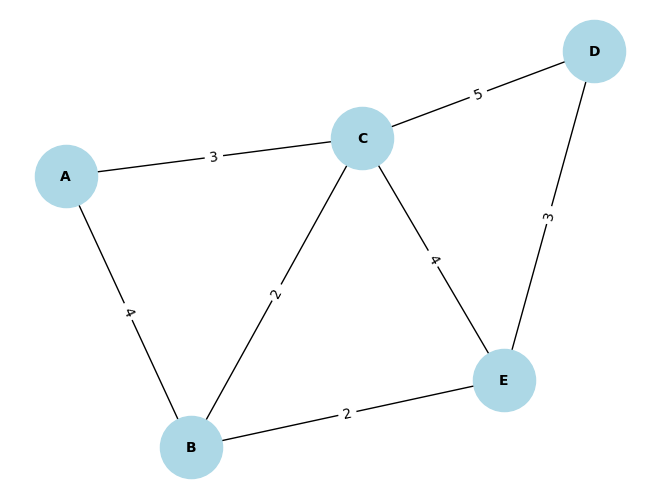

In [61]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add weighted edges
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=3)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'E', weight=2)
G.add_edge('C', 'D', weight=5)
G.add_edge('C', 'E', weight=4)
G.add_edge('D', 'E', weight=3)

# Get positions for the nodes
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')

# Draw edge labels for weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

## Summary 

* Graphs record the weights (edges) between nodes (vertices).

* Trees are more concerned with the ordering of nodes, whereas Graphs are more concerned with distances (weights) between nodes.

* Graphs are commonly modelled as adjacency lists (referenced), or adjacency matrices (indexed). 

* Trees cannot contain cycles, whereas Graphs can. It is useful to detect cycles in a Graph before attempting path finding.

* BFS and DFS can be applied to both Tree and Graph structures

* These have mainstream application in navigation and optimal path finding (SatNavs) and ANNs (AI). 

## Exercise

Let's start by recreating the graph visualised above using the adjacency matrix. 

Use either a 2D `numpy.array` or a 2D Python `list`.

In [ ]:
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=3)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'E', weight=2)
G.add_edge('C', 'D', weight=5)
G.add_edge('C', 'E', weight=4)
G.add_edge('D', 'E', weight=3)

In [ ]:
# Write your 2D Adjacency Matrix here.

## Exericse

Now create the same graph using a adjacency list. You can use any data structure you wish (apart from a `numpy.array` or a Python `list`). Just ensure that vertices contain links to connected vertices. 

Perhaps start with a Python `dict` and then model with your `LinkedList` class. 

Question: Do you foresee any performance differences between an Adjacency Matrix and an Adjacency List? 

In [ ]:
# Write your Adjacency List here.

## Exercise

Design a function which takes any Graph $g$ and returns `True` if the graph is cyclical and `False` if the graph is not cyclical (aka. acyclical).

Extension: Can you design function this to work for either an adjacency matrix or an adjacency list?

In [ ]:
def is_cyclical():
    ...

In [ ]:
is_cyclical()

## Exercise

Start with the Breadth-First Search algorithm (using a Queue) that you wrote for trees in the previous notebook. Or perhaps take the opportunity to write a BFS algorithm if you haven't yet. Adapt this algorithm to traverse a graph, printing the nodes in level order (all the children of a parent/starting node). 

In the next session we will see how Dijkstra's algorithm adapts the BFS logic to take the weights (edges) into account for finding shortest paths.


In [ ]:
# Write your solution here.

## Exercise

Start with the Depth-First Search algorithm (using a Stack) that you wrote for trees in the previous notebook. Or perhaps take the opportunity to write a DFS algorithm if you haven't yet. Adapt this algorithm to traverse a graph, printing the nodes in order of depth - pursuing the lengths of connection. 


In [ ]:
# Write your solution here. 

## Extension DFS Exercise: 

Depth-First Search (DFS) can be applied to find the path to the end of the maze. Consider the Maze grid given below as a 2D `list`, and apply your DFS algorithm to return the correct path from S to E.  

Hint: as this is a 2D `list` consider each space as a pair of coordinates. e.g. you start at position `(0, 1)`, and store the coordinates of each step to work out the path to E `(9, 5)`

<img src="https://media.licdn.com/dms/image/v2/D4D22AQFSEeBSTf2OIg/feedshare-shrink_800/feedshare-shrink_800/0/1725182967708?e=2147483647&v=beta&t=xfgTmAgolcW0zDoXyy4nm_ciWJ2mbFU756GA8lQp_7g" alt="DFS_paths" width="450">  

In [ ]:
maze = [
    ['#', 'S', '#', '#', '#', '#', '#'],
    ['#', '.', '.', '.', '#', '.', '#'],
    ['#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '#', '.', '#', '#', '#'],
    ['#', '.', '#', '.', '.', '.', '#'],
    ['#', '.', '.', '.', '#', '.', '#'],
    ['#', '.', '#', '#', '#', '.', '#'],
    ['#', '.', '.', '.', '#', '.', '#'],
    ['#', '#', '#', '#', '#', 'E', '#']
]
maze

In [ ]:
maze[0][1]

In [ ]:
maze[9][5]

## Exercise

Use Kruskal's algorithm to find a minimum spanning tree for the network below. List the arcs in the order that you consider them. State the weight of your tree.

If in doubt, assume any edges in the graph below are bidirectional. For example if `A` to `B` is 7, then `B` to `A` is also 7.

Extension: Visualise all possible minimum spanning trees with `networkx` / `matplotlib`

![Kruskals_MST](https://upload.wikimedia.org/wikipedia/commons/b/bb/KruskalDemo.gif)

In [25]:
# Reinstantiate graph
G = nx.Graph()

G.add_edge('A', 'B', weight=7)
G.add_edge('A', 'D', weight=6)
G.add_edge('A', 'E', weight=5)
#G.add_edge('B', 'A', weight=7)
G.add_edge('B', 'C', weight=5)
G.add_edge('B', 'D', weight=6)
#G.add_edge('C', 'B', weight=5)
G.add_edge('C', 'D', weight=8)
#G.add_edge('D', 'A', weight=6)
#G.add_edge('D', 'B', weight=6)
#G.add_edge('D', 'C', weight=8)
G.add_edge('D', 'E', weight=4)
#G.add_edge('E', 'A', weight=5)
#G.add_edge('E', 'D', weight=4)


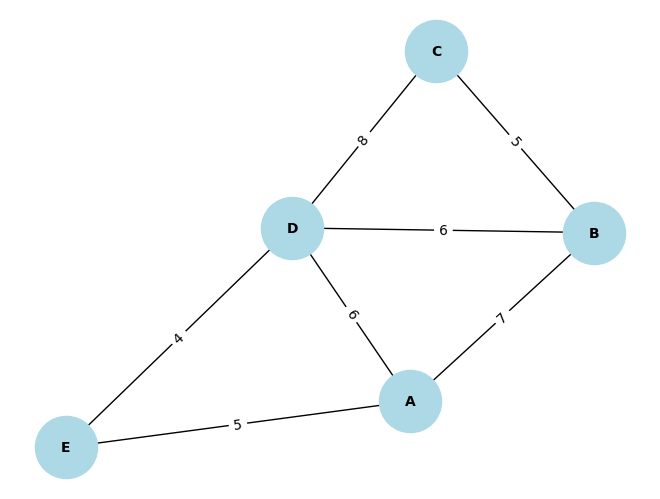

In [26]:
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')

# Draw edge labels for weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [ ]:
# Implement Kruskal's algorithm to find the Minimum-Spanning Tree here. 

## Exercise - Prim's Algorithm

Now apply Prim's Algorithm to find a minimum spanning tree for the same above network. 

Question: What is the difference between Kruskal's algorithm and Prim's algorithm?

![Prims_MST](https://upload.wikimedia.org/wikipedia/commons/9/9b/PrimAlgDemo.gif)

In [ ]:
# Implement Prim's algorithm to find the Minimum-Spanning Tree here. 

## Exericse - Topolgical Sort

Topological Sort orders vertices so that each node/vertex appears only after all the nodes pointing to it have appeared.
Write a `topological_sort()` function which will apply your DFS algorithm, in combination with a structure to print nodes of graph by these rules. 

Example: For a graph with 4 nodes and these relations: 
```
a->b
a->c 
b->d 
c->d 
```
There are two acceptable topological sorts: 
`a, b, c, d` 
and `a, c, b, d`

Note: Topological Sort is not feasible in graphs that have a cycle. Therefore, it is helpful to first detect whether a graph has a cycle. 


In [ ]:
def topological_sort():
    ...

In [ ]:
topological_sort()

## Scenario Exercise - Knowledge Graphs 

Expert systems embed the symbolic approach to the development of AI and date back to the 1950s. These expert systems are still in use today, but the necessity to code by hand their knowledge propositions implies that they scale poorly.

This, in turn, led to the development of automated solutions for the extraction of semantic relationships in unstructured texts. These extracted relationships are what today constitutes knowledge graphs in modern expert systems. 

![KG_](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Conceptual_Diagram_-_Example.svg/1920px-Conceptual_Diagram_-_Example.svg.png)

Let’s start with these two sentences:

* Socrates is a human
* A human is a mortal

From which we can derive the following two 3-tuples of knowledge:

* (Socrates, human, is)
* (human, mortal, is)

By noting how the object (second element) of the first tuple is also the subject (first element) of the second tuple, we can then establish the following concatenation:

Socrates is human is mortal
This, in turn, implies that the relationship (Socrates, mortal, is) must also be true. At the end of this logic reasoning we can expand our set of 3-tuples, which now contains three elements:

* (Socrates, human, is)
* (human, mortal, is)
* (Socrates, mortal, is)

The procedure we’ve followed allowed us to generate new knowledge, corresponding to an expansion in the set of knowledge propositions, exclusively by means of logical operations. Notice how this type of reasoning can be conducted without any understanding of what Socrates, humans, or mortality really are.

https://www.baeldung.com/cs/ml-knowledge-graphs#:~:text=This%2C%20in%20turn%2C%20led%20to,graphs%20in%20modern%20expert%20systems. 

In [ ]:
# Write your solution here. 